## 23-03-2025

In [26]:
#  Visualize Association Rules (Network Graph)

import pandas as pd
data = [['milk', 'bread', 'butter'],
        ['beer', 'bread'],
        ['milk', 'bread', 'butter', 'beer'],
        ['bread', 'butter']]

df = pd.DataFrame({'Transaction': data})
df

,Transaction
0,"[milk, bread, butter]"
1,"[beer, bread]"
2,"[milk, bread, butter, beer]"
3,"[bread, butter]"


In [30]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [31]:
te=TransactionEncoder()

In [32]:
te_ary=te.fit(data).transform(data)
te_ary

array([[False,  True,  True,  True],
       [ True,  True, False, False],
       [ True,  True,  True,  True],
       [False,  True,  True, False]])

In [33]:
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)
df_encoded

,beer,bread,butter,milk
0,False,True,True,True
1,True,True,False,False
2,True,True,True,True
3,False,True,True,False


In [34]:
frequent_itemset=apriori(df_encoded,min_support=0.5,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.50,(beer)
1,1.00,(bread)
2,0.75,(butter)
3,0.50,(milk)
4,0.50,"(bread, beer)"
5,0.75,"(bread, butter)"
6,0.50,"(bread, milk)"
7,0.50,"(milk, butter)"
8,0.50,"(milk, bread, butter)"


In [39]:
rules=association_rules(frequent_itemset,metric="lift",min_threshold=0.8,num_itemsets='int')
rules

C:\Users\91805\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bread),(beer),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
1,(beer),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
2,(bread),(butter),1.00,0.75,0.75,0.750000,1.000000,1.0,0.000,1.0,0.0,0.750000,0.000000,0.875000
3,(butter),(bread),0.75,1.00,0.75,1.000000,1.000000,1.0,0.000,inf,0.0,0.750000,0.000000,0.875000
4,(bread),(milk),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
5,(milk),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
6,(milk),(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
7,(butter),(milk),0.75,0.50,0.50,0.666667,1.333333,1.0,0.125,1.5,1.0,0.666667,0.333333,0.833333
8,"(bread, milk)",(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
9,"(milk, butter)",(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000


In [40]:
import networkx as nx
import matplotlib.pyplot as plt

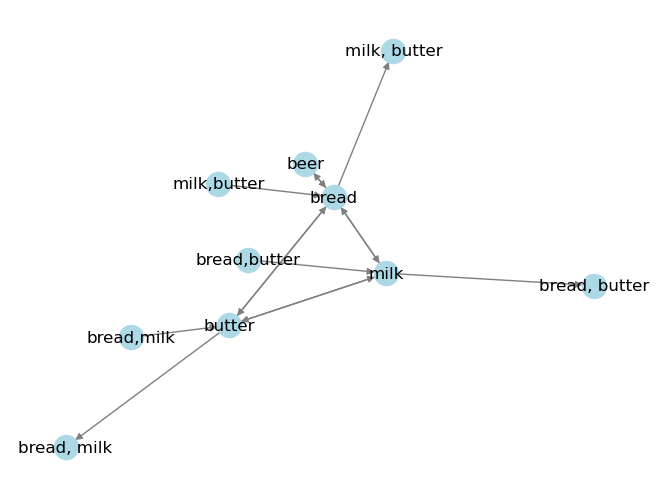

In [42]:
G=nx.DiGraph()
for _,row in rules.iterrows():
    G.add_edge(','.join(row['antecedents']),', '.join(row['consequents']),weight=row['lift'])

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()



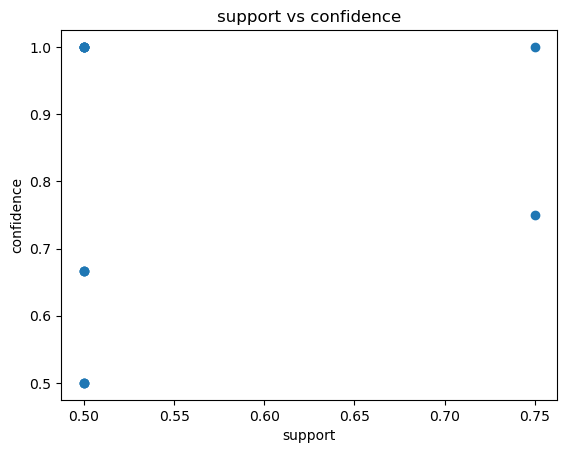

In [43]:
# Association Rules on Synthetic Data with Scatter Plot of Support vs Confidence
import random

items=['milk','bread','butter','jam','cheese','eggs']
data=[[random.choice(items) for _ in range(random.randint(2,4))] for _ in range(20)]

plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()